In [1]:
# https://arxiv.org/pdf/1706.03319v2.pdf

In [2]:
import cv2
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_path = '../data/raw/*.png'
img_paths = glob.glob(data_path)
len(img_paths)

21551

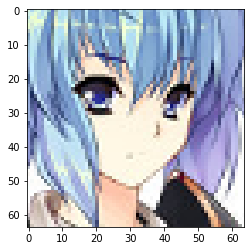

In [4]:
plt.imshow(plt.imread(img_paths[1]))

In [5]:
def get_outline_v1(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 170, 255, cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if len(c) > 3]
    contours_img = cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
    outline = cv2.drawContours(np.ones(img.shape) * 255, contours, -1, (0, 0, 0), 1)
    return outline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


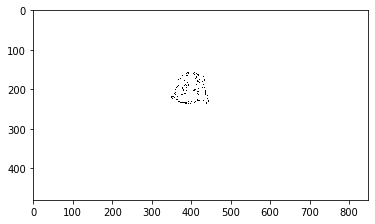

In [360]:
img_path = img_paths[18]
img = cv2.imread(img_path)
plt.imshow(get_outline_v1(img))

In [7]:
data_path = '../data/anime_frames/*.png'
img_paths = glob.glob(data_path)
len(img_paths)

25646

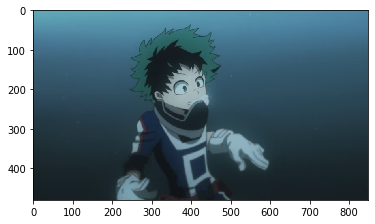

In [355]:
img_path = img_paths[18]
img = plt.imread(img_path)
plt.imshow(img)

In [91]:
print(get_outline_v2(img).shape)

(480, 848)


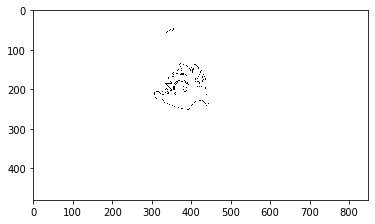

In [358]:
def get_outline_v2(img):
    return 255 - cv2.Canny(img, 200, 400)

img_path = img_paths[18]
img = cv2.imread(img_path)
plt.imshow(get_outline_v2(img), cmap='gray')

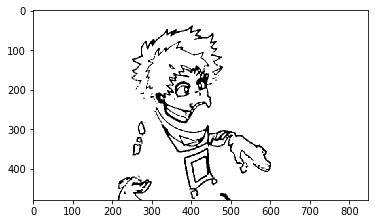

In [354]:
def get_outline_v3(img):
    img = np.int32(img)
    
    thresh = 30
    outline = np.ones(img.shape[:2]) * 255
    diff1 = np.clip(np.sum(np.abs(img[1:, 1:] - img[:-1, 1:]), axis=-1) - thresh, 0, 1)
    diff2 = np.clip(np.sum(np.abs(img[1:, 1:] - img[1:, :-1]), axis=-1) - thresh, 0, 1)
    
    outline = diff1 | diff2
    outline = outline * 255
    outline = np.int16(np.stack([outline] * 3, axis=-1))
    
    kernel = np.ones((2, 2))
    
    outline = cv2.morphologyEx(outline, cv2.MORPH_CLOSE, kernel, iterations=2)
    outline = cv2.erode(outline, kernel, iterations=1)
    outline = cv2.dilate(outline, kernel, iterations=1)
    outline = cv2.morphologyEx(outline, cv2.MORPH_OPEN, kernel, iterations=1)
    
    smooth_size = 2
    kernel = np.ones((smooth_size, smooth_size),np.float32) / smooth_size**2
    outline = cv2.filter2D(outline, -1, kernel)
            
    return 255 - outline

img_path = img_paths[1]
img = cv2.imread(img_path)
plt.imshow(get_outline_v3(img), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


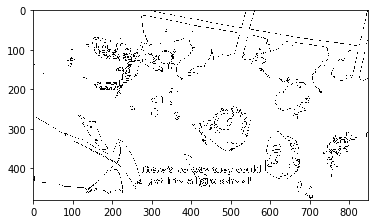

In [65]:
img_path = img_paths[0]
img = cv2.imread(img_path)
plt.imshow(get_outline_v2(img))

In [342]:
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if len(c) > 3]
    contours_img = cv2.drawContours(np.ones((64, 64, 3)) * 255, contours, -1, (0, 0, 0), 1)
    
    final_img = np.concatenate([img, contours_img], axis=1)
    
    cv2.imwrite(f'../data/formatted/{i}.png', final_img)

In [349]:
np.stack([img_gray, img_gray, img_gray], axis=-1)

(64, 64, 3)

In [350]:
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if len(c) > 3]
    contours_img = cv2.drawContours(np.ones((64, 64, 3)) * 255, contours, -1, (0, 0, 0), 1)
    
    img_gray = np.stack([img_gray, img_gray, img_gray], axis=-1)
    final_img = np.concatenate([img_gray, contours_img], axis=1)
    
    cv2.imwrite(f'../data/gray_formatted/{i}.png', final_img)

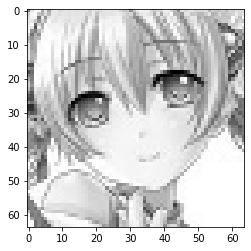

In [72]:
plt_imshow(img_gray)

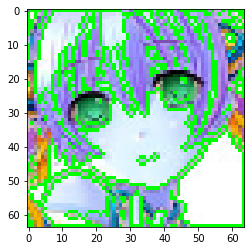

In [73]:
plt.imshow(contours_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


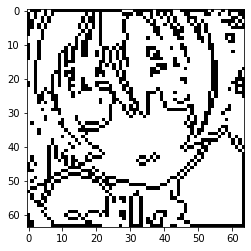

In [74]:
plt.imshow(cv2.drawContours(np.ones((64, 64, 3)) * 255, contours, -1, (0, 0, 0), 1))